# Filtering and Convolution

In [24]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["figure.figsize"] = (12, 4)
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

### Convolution

[An interactive demo](https://www.desmos.com/calculator/ea96vohtuq)

![](images/convolution_equation.jpg)

![](images/convolution.png)

Convolution examples.

![](images/convolution1.gif)

![](images/convolution2.gif)

Instrument response function.

![](images/optics-instrument-response.png)

![](images/conv_corr_acorr.jpg)

Convolution of two time series can be done by simple multiplication in the frequency domain using Fourier Transforms.

![](images/convolve-multiply.png)

Convolution of discrete 1D arrays

![](images/conv_discrete1d.png)

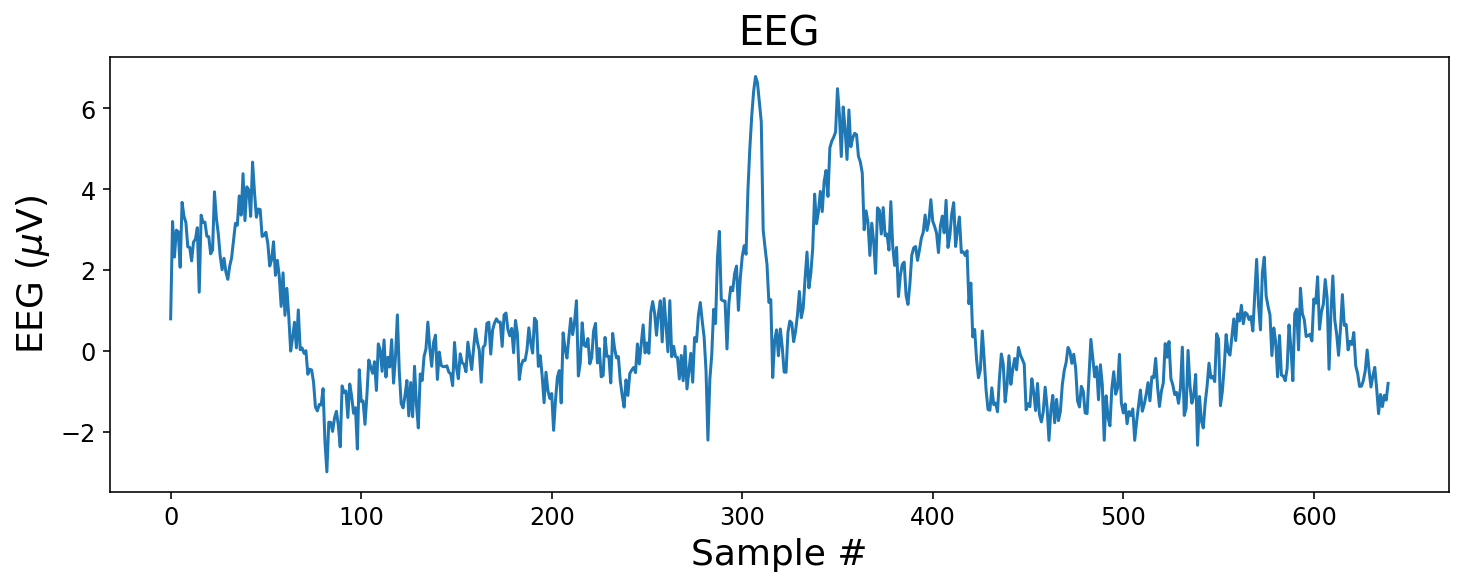

In [15]:
EEG = np.load('EEG.npy')

plt.plot(EEG)
plt.xlabel('Sample #')
plt.ylabel('EEG ($\mu$V)')
plt.title('EEG');

Consider the following uniform kernel.

In [16]:
uniform_kernel = np.ones((3,)) / 3

uniform_kernel

array([0.33333333, 0.33333333, 0.33333333])

What would convolving the EEG waveform with the above kernel do?

In [19]:
from scipy import signal

In [21]:
EEG_conv_w_uniform = signal.convolve(EEG, uniform_kernel, mode='same')

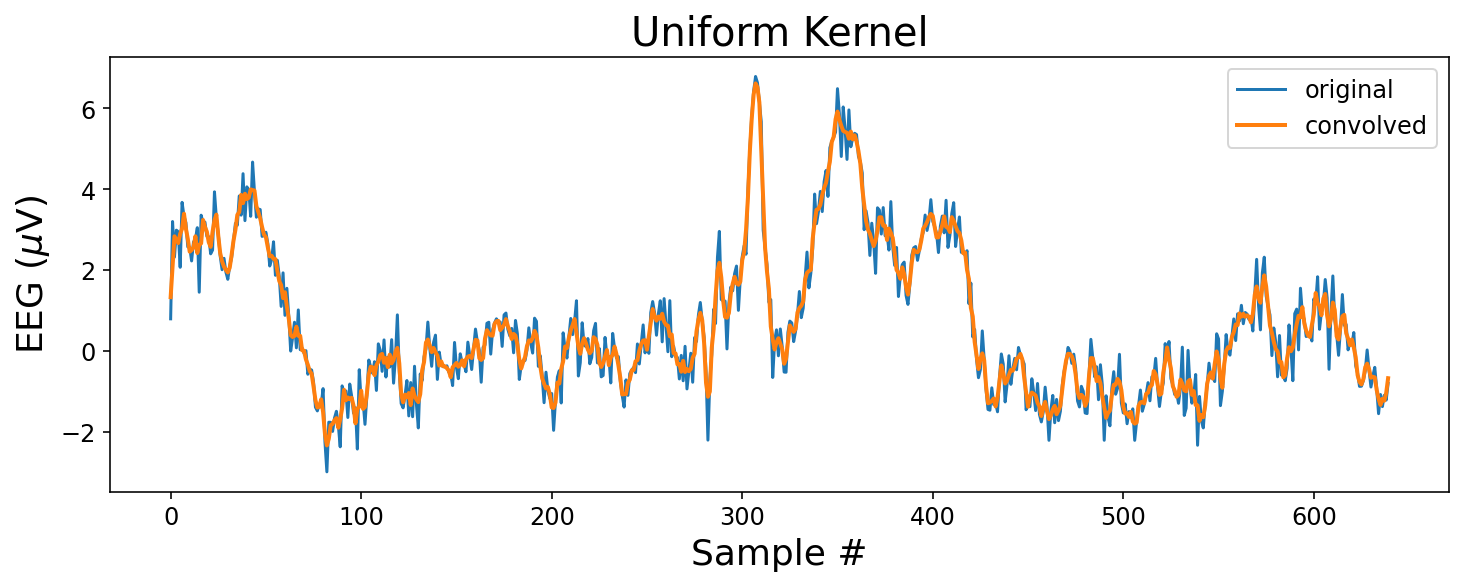

In [22]:
plt.plot(EEG, label='original')
plt.plot(EEG_conv_w_uniform, label='convolved', lw=2)
plt.xlabel('Sample #')
plt.ylabel('EEG ($\mu$V)')
plt.title('Uniform Kernel')
plt.legend();

# Question?

Which of the following kernels would take the average of every 5 points?

    A) [1, 1, 1, 1, 1]
    B) [0.2, 0.2, 0.2, 0.2, 0.2]
    C) [0.1, 0.2, 0.3, 0.2, 0.1]

Gaussian kernel.

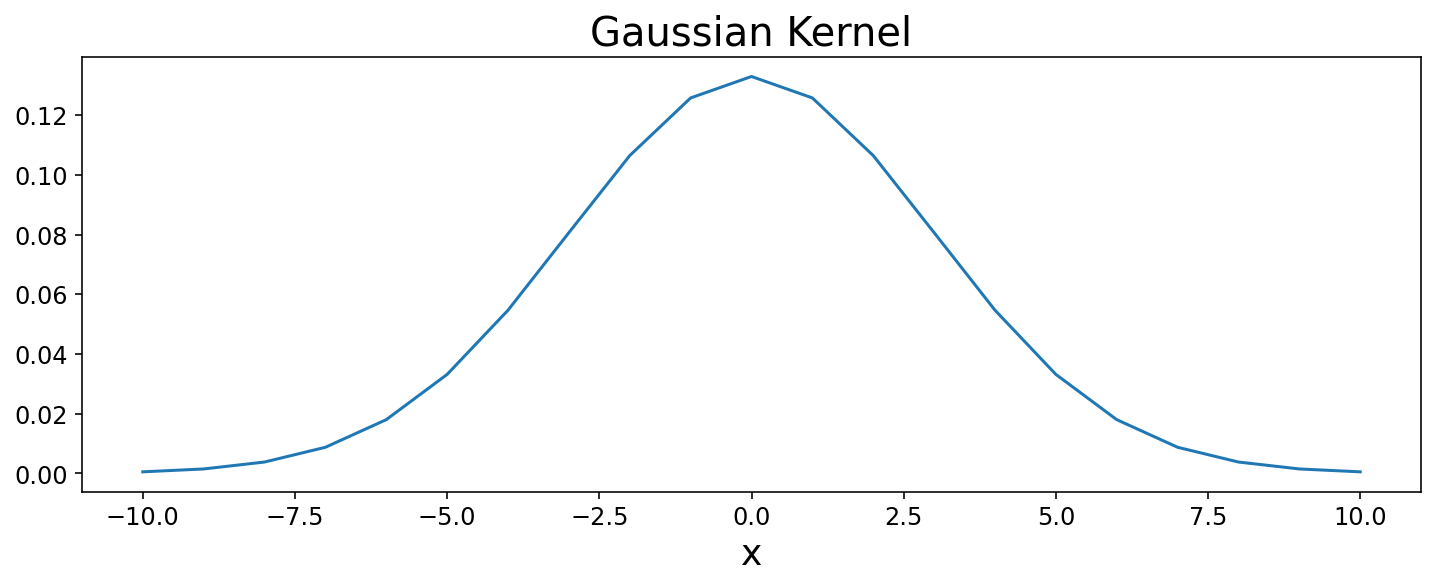

In [25]:
x = np.arange(-10, 11)
gauss_kernel = st.norm.pdf(x, 0, 3)

plt.plot(x, gauss_kernel);
plt.xlabel('x')
plt.title('Gaussian Kernel');

What would convolving the EEG waveform with the above kernel do?

# Exercise

Convolve the EEG waveform with the gaussian kernel from above.

In [ ]:
EEG_conv_w_gauss = ...

plt.plot(EEG, label='original')
plt.plot(EEG_conv_w_gauss, label='convolved', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Gaussian Kernel')
plt.legend();

# Exercise

Change about the above Gaussian kernel so as to filter the waveform either less or more.

In [ ]:
gauss_kernel_filter_less = ...
gauss_kernel_filter_more = ...

EEG_conv_w_gauss_less = ...
EEG_conv_w_gauss_more = ...

plt.plot(EEG, label='original')
plt.plot(EEG_conv_w_gauss, label='convolved', lw=2)
plt.plot(EEG_conv_w_gauss_less, label='convolved', lw=2)
plt.plot(EEG_conv_w_gauss_more, label='convolved', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Gaussian Kernel')
plt.legend();

### Filtering

We're only touching on a few of the many options that exist for filtering.
See https://docs.scipy.org/doc/scipy-0.17.1/reference/signal.html for more options within scipy.signal.

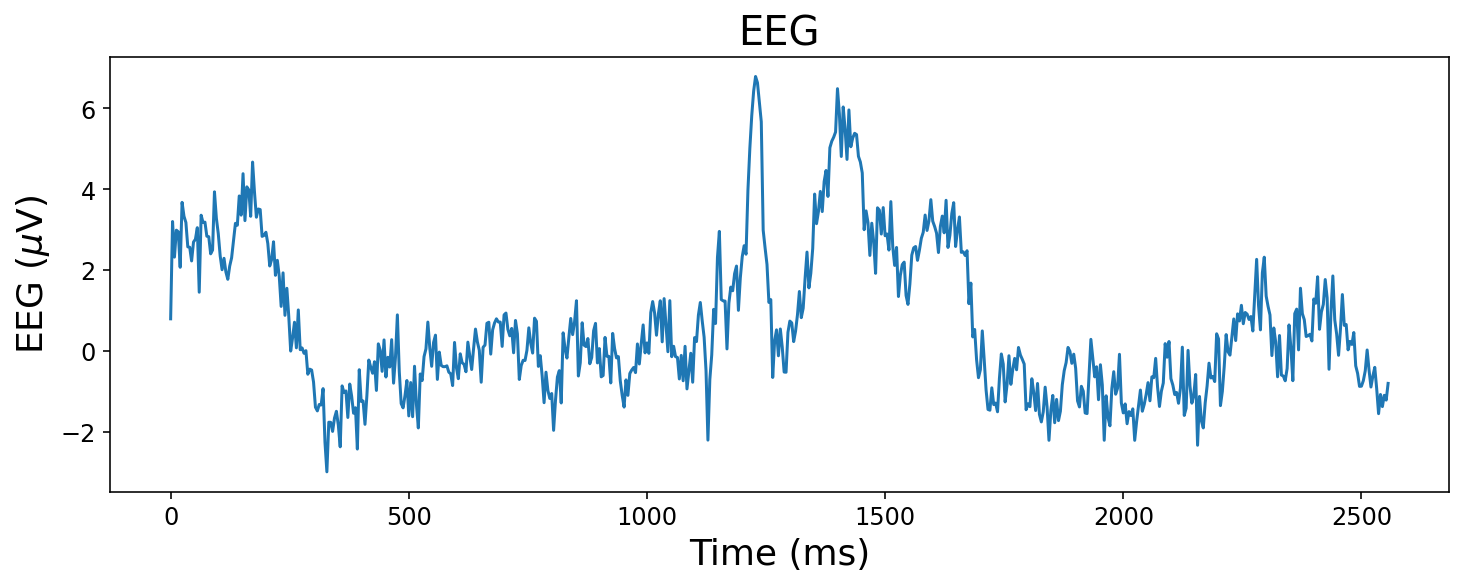

In [31]:
sampleFreq_kHz = 0.25

time_ms = np.arange(len(EEG)) * (1 / sampleFreq_kHz)

plt.plot(time_ms, EEG)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('EEG');

Lowpass finite impulse response (FIR) filter to remove frequencies above 30 Hz (0.03 kHz).

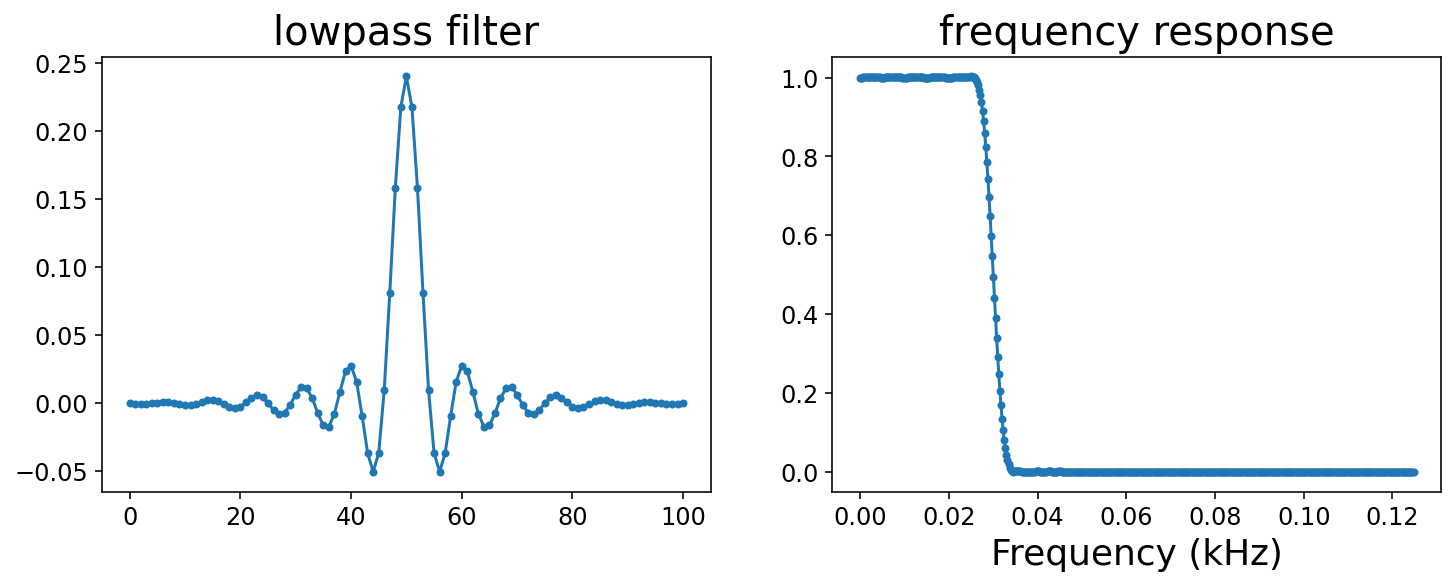

In [32]:
nyquistFreq_kHz = sampleFreq_kHz / 2
cutoffFreq_kHz = 0.03

# Use an odd number of taps (e.g. 101). Read the docs about this.
lowpass = signal.firwin(101, cutoffFreq_kHz, nyq=nyquistFreq_kHz)

plt.subplot(1,2,1)
plt.plot(lowpass, '.-')
plt.title('lowpass filter')
radiansPerSample, frequencyResponse = signal.freqz(lowpass)
freq_kHz = radiansPerSample / (2 * np.pi) * sampleFreq_kHz
plt.subplot(1,2,2)
plt.plot(freq_kHz, np.abs(frequencyResponse), '.-')
plt.xlabel('Frequency (kHz)')
plt.title('frequency response');

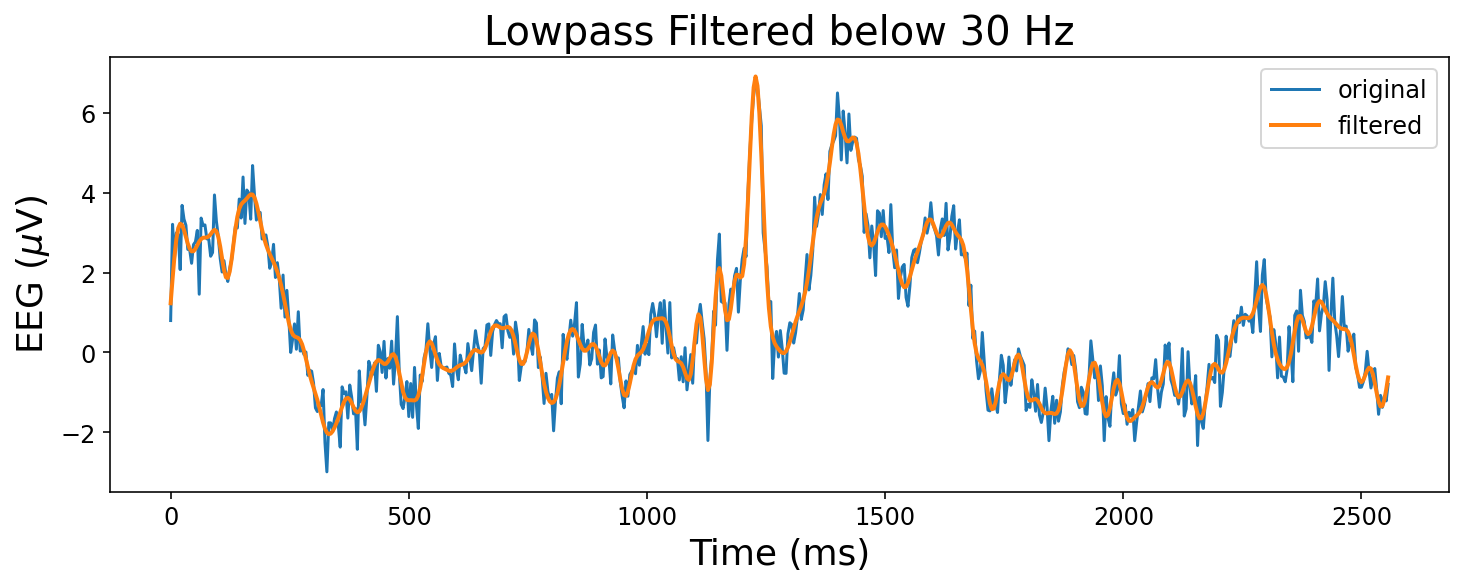

In [34]:
EEG_lowpass_filtered = np.convolve(EEG, lowpass, 'same')

plt.plot(time_ms, EEG, label='original')
plt.plot(time_ms, EEG_lowpass_filtered, label='filtered', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Lowpass Filtered below 30 Hz')
plt.legend();

Highpass finite impulse response (FIR) filter to remove frequencies below 10 Hz (0.01 kHz).

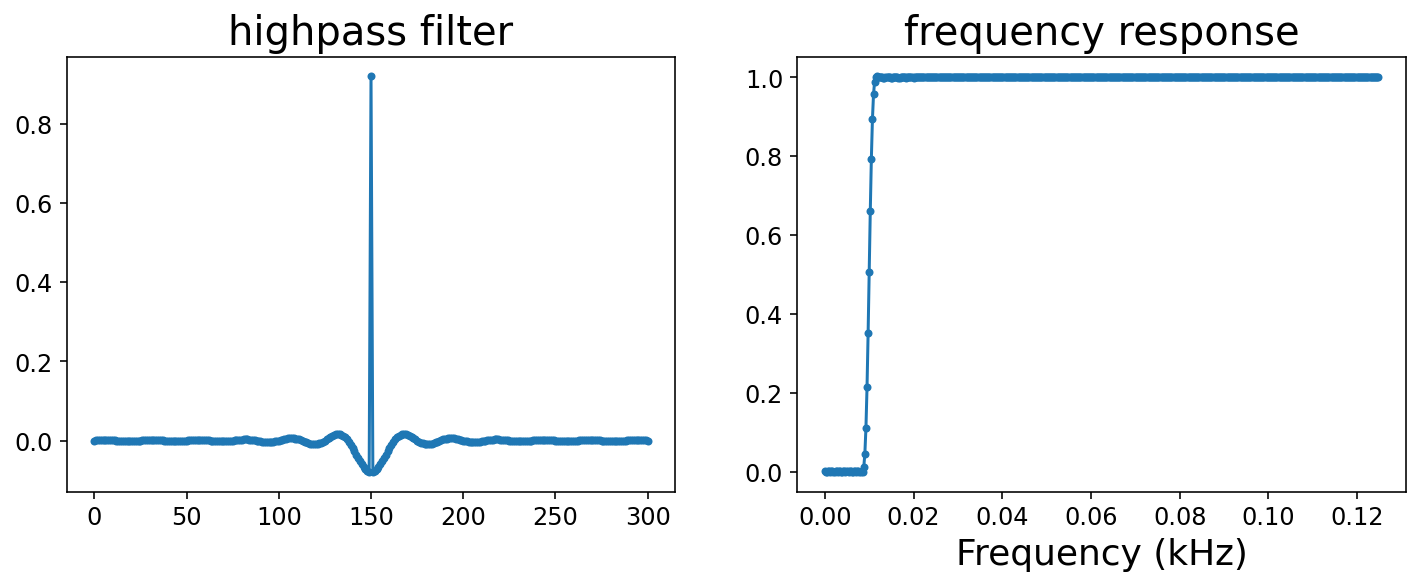

In [38]:
nyquistFreq_kHz = sampleFreq_kHz / 2
cutoffFreq_kHz = 0.01

highpass = signal.firwin(301, cutoffFreq_kHz, pass_zero=False, nyq=nyquistFreq_kHz)

plt.subplot(1,2,1)
plt.plot(highpass, '.-')
plt.title('highpass filter')
radiansPerSample, frequencyResponse = signal.freqz(highpass)
freq_kHz = radiansPerSample / (2 * np.pi) * sampleFreq_kHz
plt.subplot(1,2,2)
plt.plot(freq_kHz, np.abs(frequencyResponse), '.-')
plt.xlabel('Frequency (kHz)')
plt.title('frequency response');

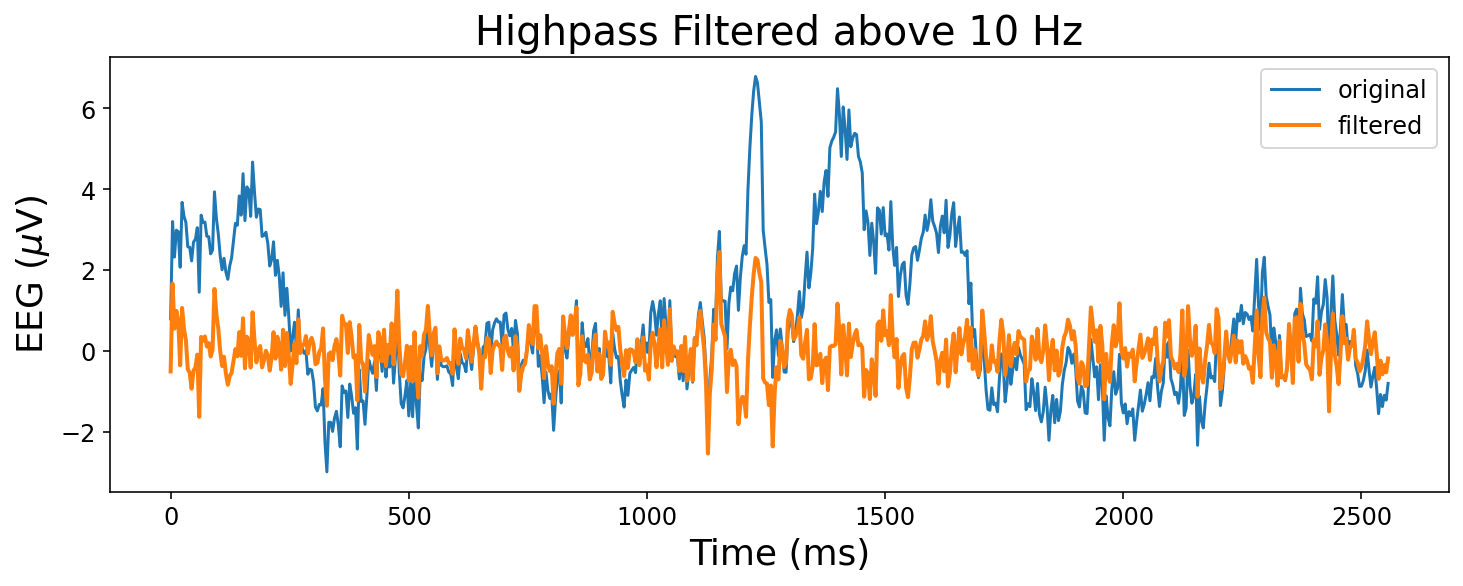

In [40]:
EEG_highpass_filtered = np.convolve(EEG, highpass, 'same')

plt.plot(time_ms, EEG, label='original')
plt.plot(time_ms, EEG_highpass_filtered, label='filtered', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Highpass Filtered above 10 Hz')
plt.legend();

Bandpass finite impulse response (FIR) filter to remove frequencies outside of 10-30 Hz (0.01-0.03 kHz).

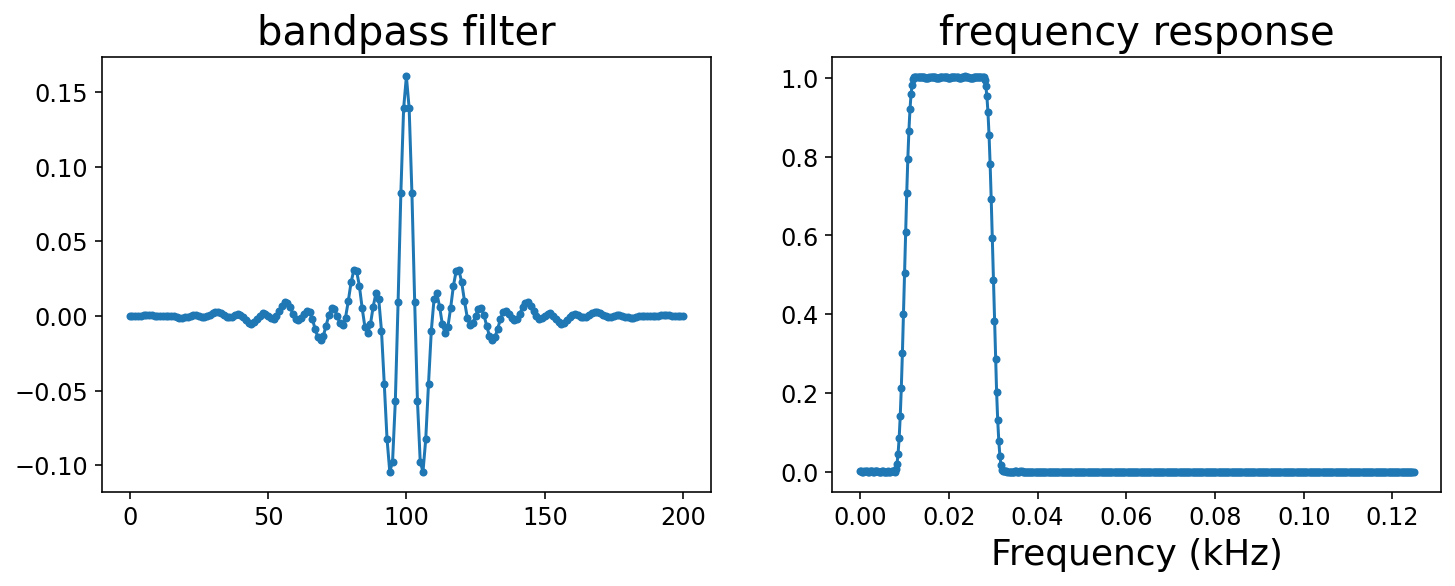

In [41]:
nyquistFreq_kHz = sampleFreq_kHz / 2
cutoffFreq_kHz = [0.01, 0.03]

bandpass = signal.firwin(201, cutoffFreq_kHz, pass_zero=False, nyq=nyquistFreq_kHz)

plt.subplot(1,2,1)
plt.plot(bandpass, '.-')
plt.title('bandpass filter')
radiansPerSample, frequencyResponse = signal.freqz(bandpass)
freq_kHz = radiansPerSample / (2 * np.pi) * sampleFreq_kHz
plt.subplot(1,2,2)
plt.plot(freq_kHz, np.abs(frequencyResponse), '.-')
plt.xlabel('Frequency (kHz)')
plt.title('frequency response');

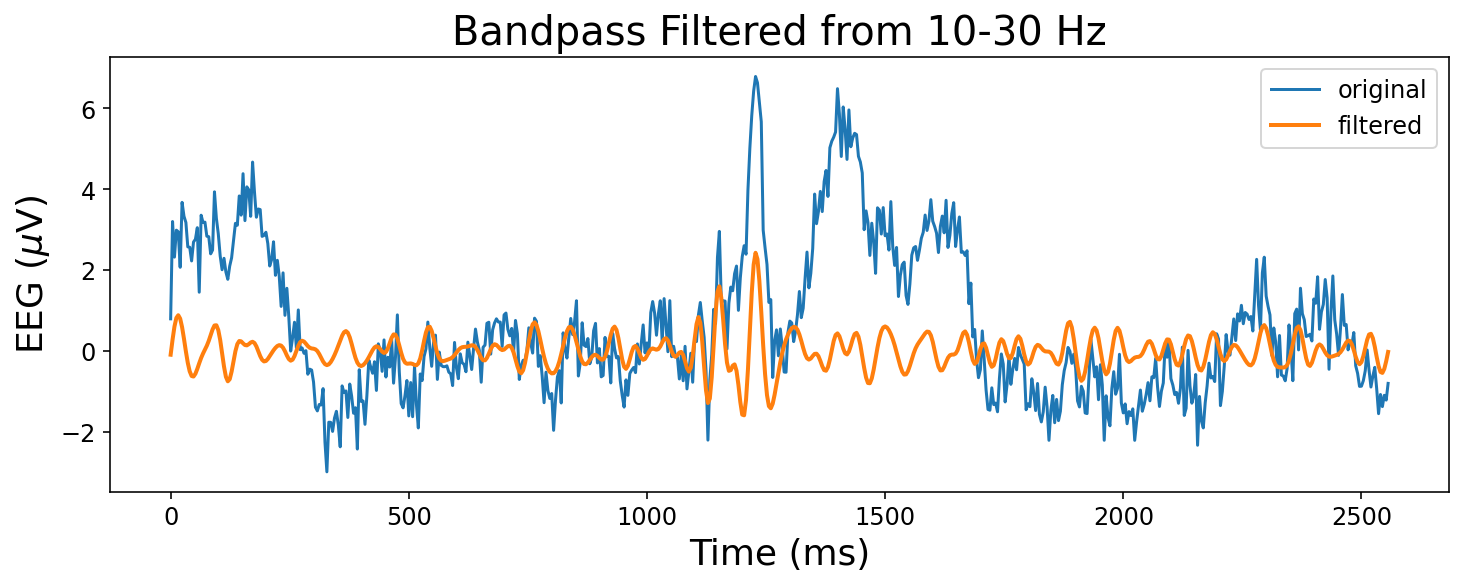

In [43]:
EEG_bandpass_filtered = np.convolve(EEG, bandpass, 'same')

plt.plot(time_ms, EEG, label='original')
plt.plot(time_ms, EEG_bandpass_filtered, label='filtered', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Bandpass Filtered from 10-30 Hz')
plt.legend();

Some functions for convenience.

In [45]:
def plotFFT(waveform, sampleFreq, freqUnits='Hz', freqRange=None):
    fft = np.fft.fft(waveform)
    dt = 1 / sampleFreq
    freq = np.fft.fftfreq(len(fft), dt)
    pos = (freq > 0)
    plt.plot(freq[pos], np.abs(fft[pos]))
    plt.xlabel(f'Frequency ({freqUnits})')
    plt.title('FFT')
    if freqRange is not None:
        plt.xlim(freqRange[0], freqRange[1])

In [46]:
def analyzeWaveform(waveform, sampleFreq, freqUnits='Hz', timeUnits='s', freqRange=None):
    dt = 1 / sampleFreq
    time = np.arange(len(waveform)) * dt
    
    plt.subplot(1,2,1)
    plt.plot(time, waveform)
    plt.xlabel(f'Time ({timeUnits})')
    plt.title('Waveform')
    
    plt.subplot(1,2,2)
    plotFFT(waveform, sampleFreq, freqUnits, freqRange)
    
    plt.tight_layout()

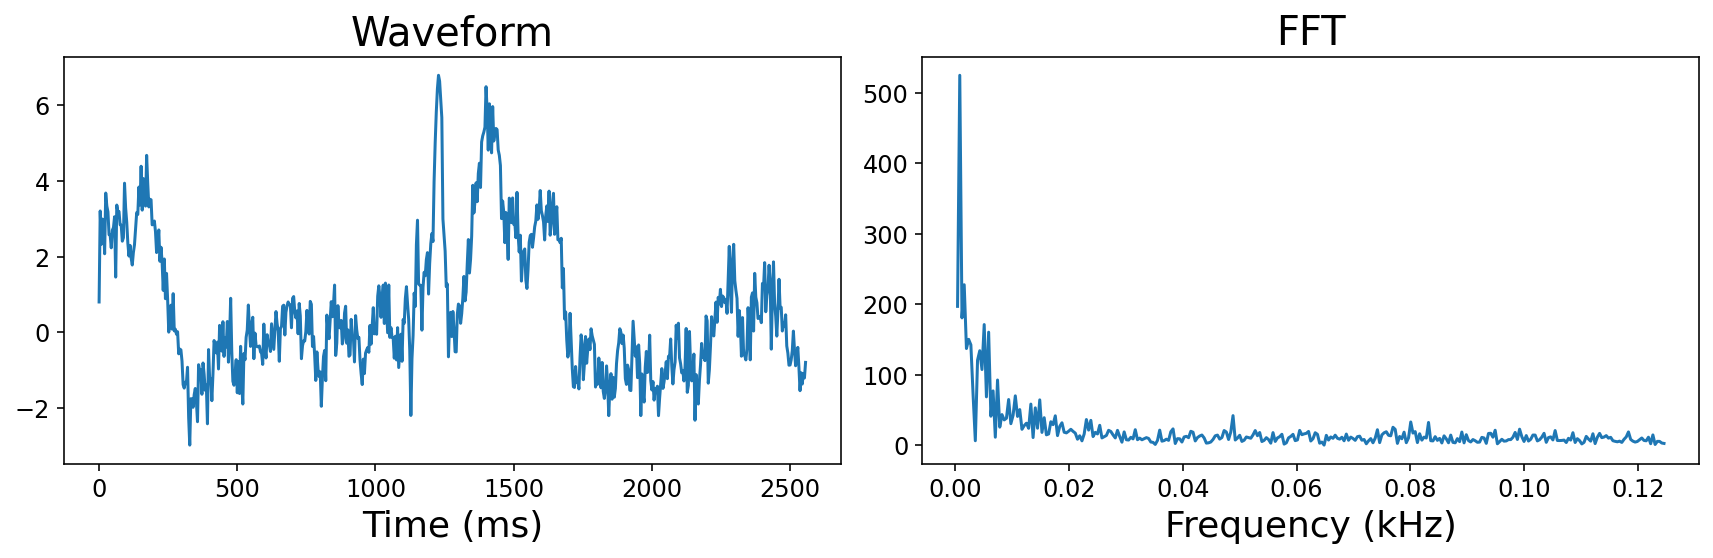

In [47]:
analyzeWaveform(EEG, sampleFreq=0.25, freqUnits='kHz', timeUnits='ms')

### Subsampling and Aliasing

A simple example with frequencies at 10 Hz and 80 Hz.

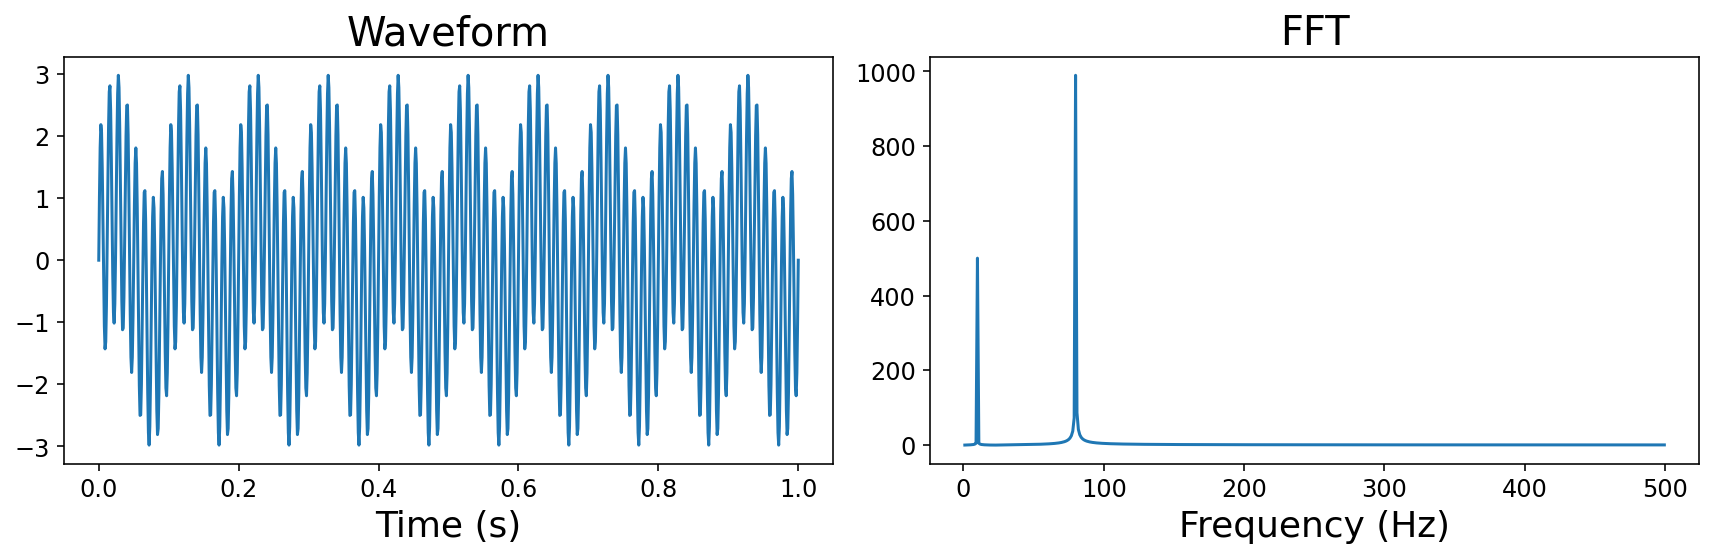

In [48]:
time_sec = np.arange(0, 1.001, 0.001)  # sample at 1000 Hz
data_10Hz = np.sin(2 * np.pi * 10 * time_sec)
data_80Hz = np.sin(2 * np.pi * 80 * time_sec)

data1080 = data_10Hz + 2 * data_80Hz

analyzeWaveform(data1080, sampleFreq=1000, freqUnits='Hz', timeUnits='s')

Artifacts upon subsampling at 50 Hz.

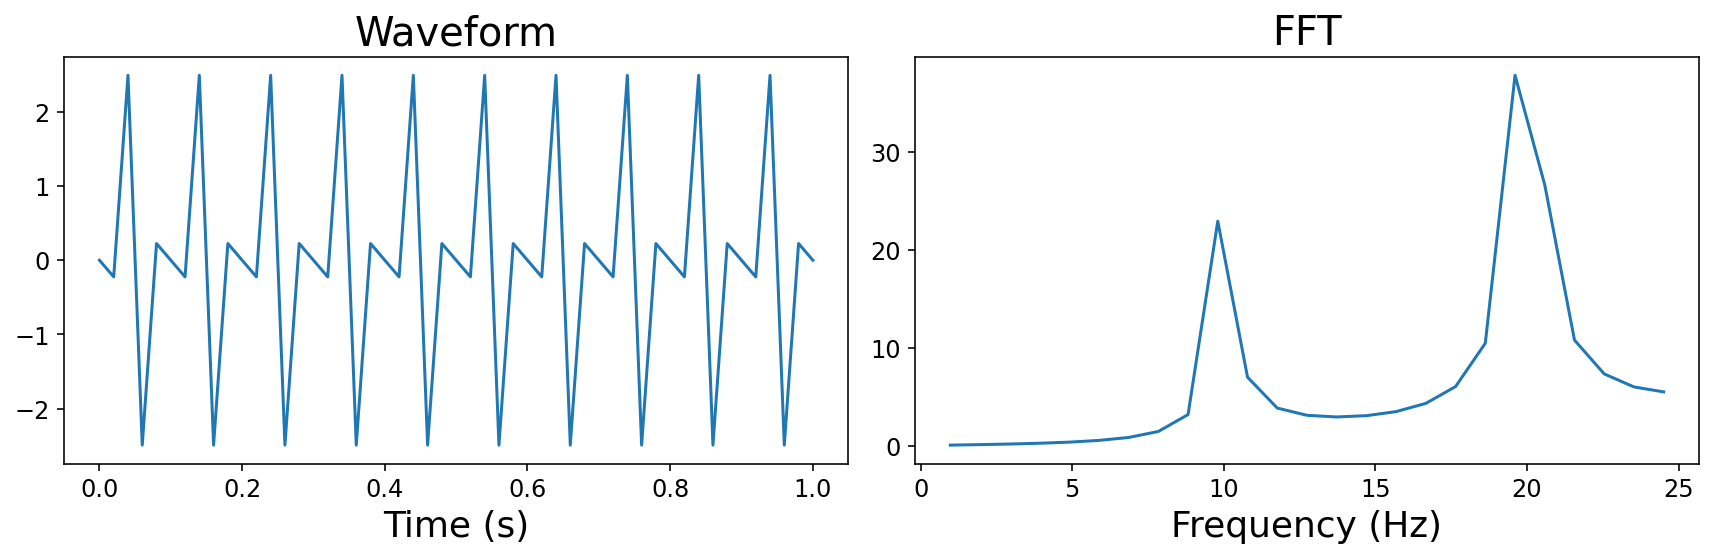

In [49]:
analyzeWaveform(data1080[::20], sampleFreq=50, freqUnits='Hz', timeUnits='s')

At a 50 Hz sample rate, what is the fastest freqeuncy that can be resolved?

What if we just got rid of the source of the artifact, which is frequencies that are too fast to be represented by a 50 Hz sample rate.

Lowpass filter first, then subsample.

The idea is to first remove any frequencies that are too fast relative to the sub-sample frequency so that they don't create artifacts in the sub-sampled trace.

In [50]:
# first lowpass filter to get rid of frequencies above 25 Hz
lowpass = signal.firwin(101, 25, nyq=500)
lp_data1080 = np.convolve(data1080, lowpass, 'same')

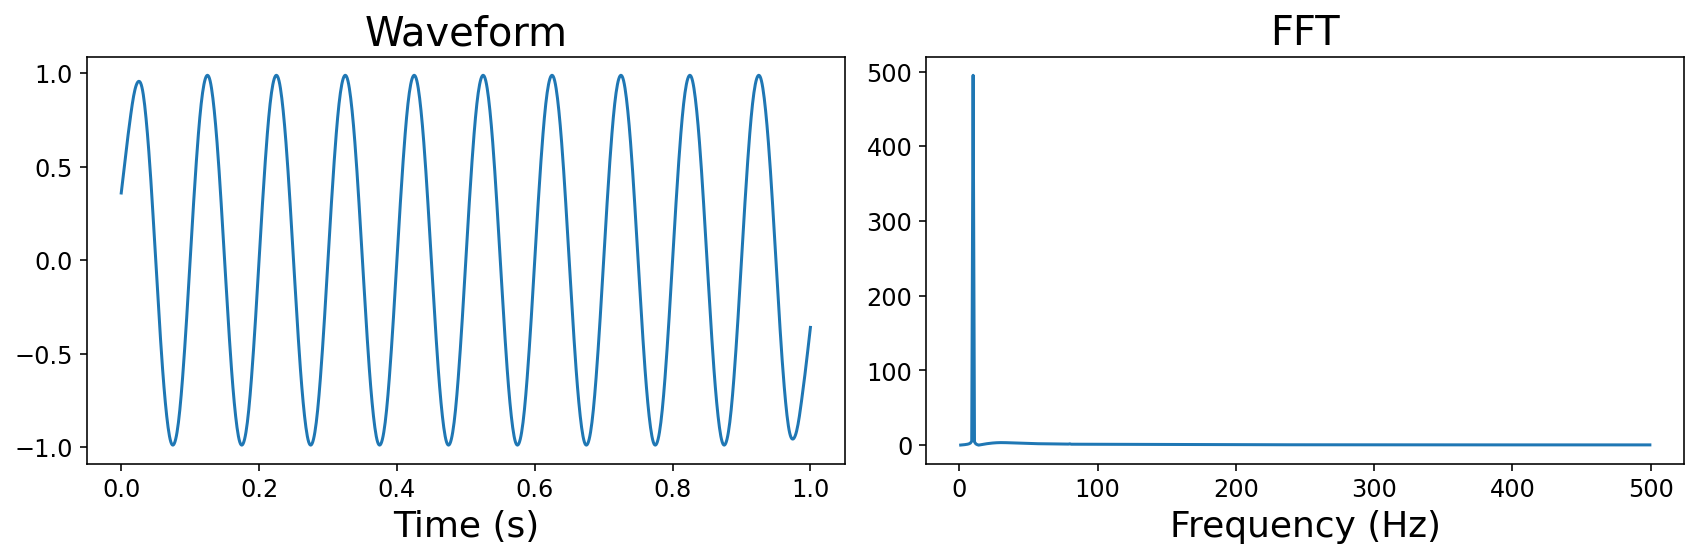

In [54]:
analyzeWaveform(lp_data1080, sampleFreq=1000, freqUnits='Hz', timeUnits='s')

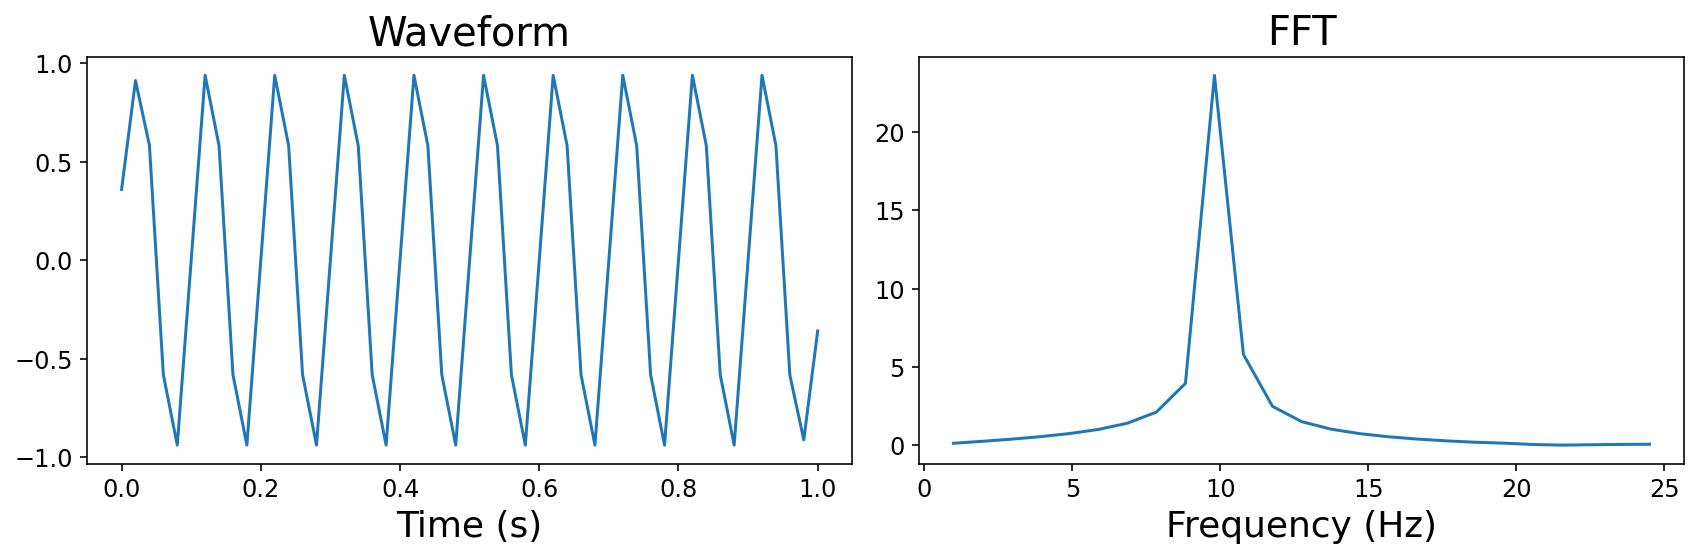

In [55]:
# subsample the lowpass filtered waveform at 50 Hz
analyzeWaveform(lp_data1080[::20], sampleFreq=50, freqUnits='Hz', timeUnits='s')

`decimate` makes this oh so easy...

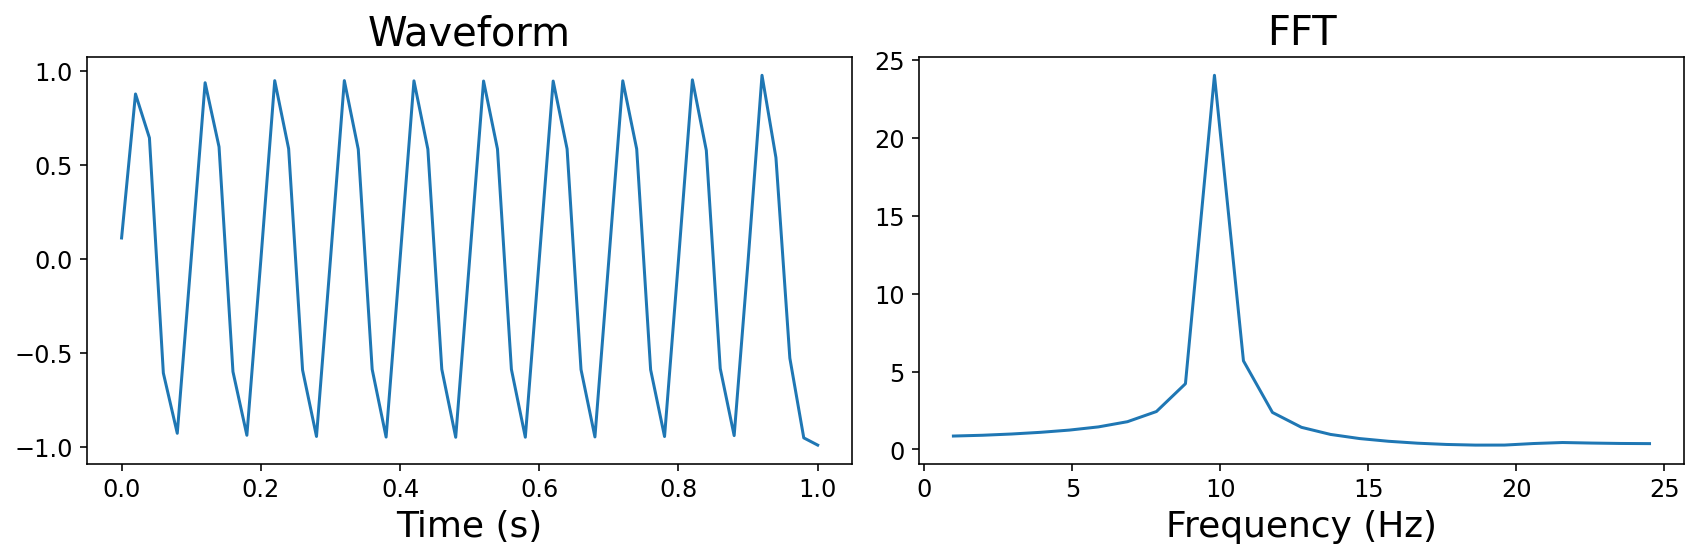

In [56]:
# downsample every 20th data point (i.e. at 50 Hz)
downsampled_data1080 = signal.decimate(data1080, 20)

analyzeWaveform(downsampled_data1080, sampleFreq=50, freqUnits='Hz', timeUnits='s')

Subsampling and Aliasing in 2D Images.

![](images/image_aliasing.png)

Image from Alex Huth's lecture slides.

### Convolution in 2D

![](images/image_convolution.png)

Some examples of image convolution at https://aishack.in/tutorials/image-convolution-examples/

First some basic image manipulation with scikit-image.

`conda install -c conda-forge scikit-image`

In [58]:
from skimage import io

In [59]:
im = io.imread('images/neurons.jpg')

im.shape, im.dtype

((256, 512, 3), dtype('uint8'))

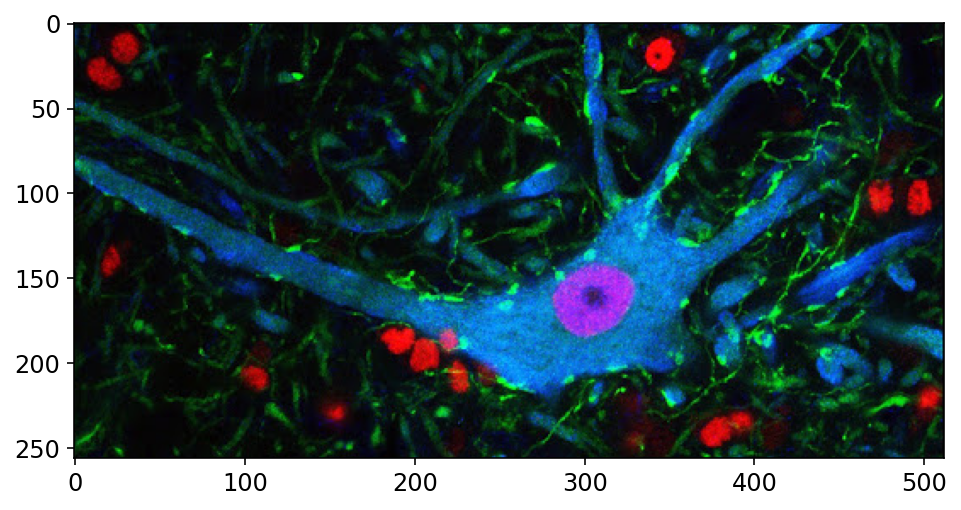

In [60]:
plt.imshow(im);

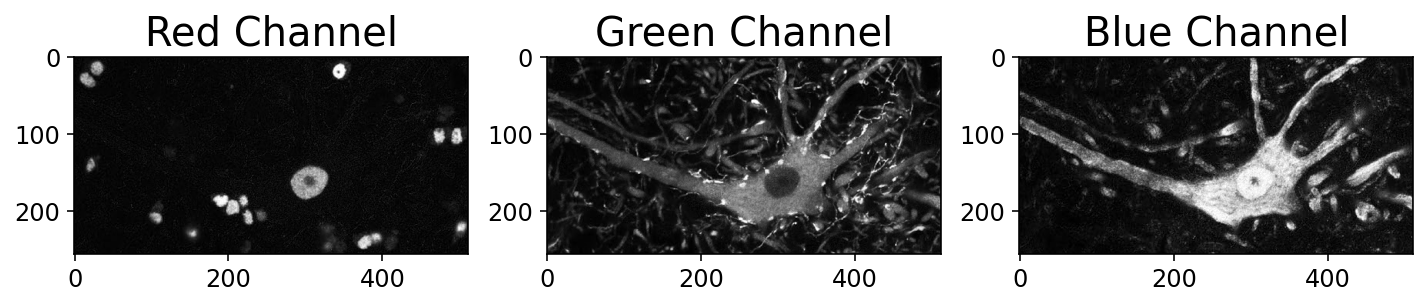

In [61]:
plt.subplot(1,3,1)
plt.imshow(im[:,:,0], cmap='gray')
plt.title('Red Channel');

plt.subplot(1,3,2)
plt.imshow(im[:,:,1], cmap='gray')
plt.title('Green Channel');

plt.subplot(1,3,3)
plt.imshow(im[:,:,2], cmap='gray')
plt.title('Blue Channel');

Blur the image in the green channel by averaging all pixels within a 5x5 sqaure.

In [62]:
from scipy import ndimage

In [63]:
uniform_kernel2d = np.ones((5,5)) / 25

uniform_kernel2d

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

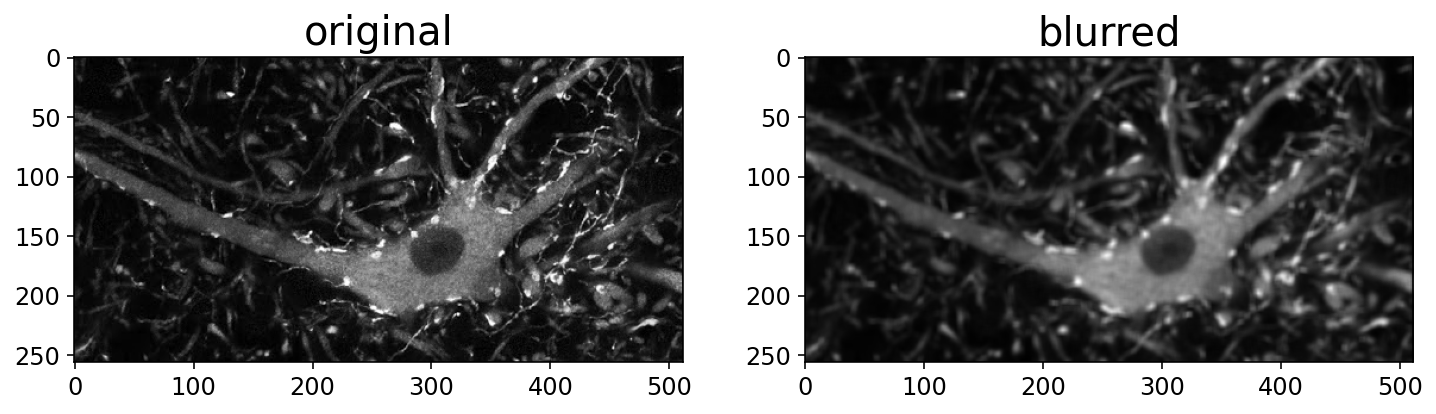

In [64]:
green = im[:,:,1]

green_blurred = ndimage.convolve(green, uniform_kernel2d)

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title('original');

plt.subplot(1,2,2)
plt.imshow(green_blurred, cmap='gray')
plt.title('blurred');

# Exercise

FIlter the green image by averaging all pixels within a 10x10 square.

In [ ]:
kernel = ...

green_blurred = ...

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title('original');
plt.subplot(1,2,2)
plt.imshow(green_blurred, cmap='gray')
plt.title('blurred');

Gaussian blur in 2D

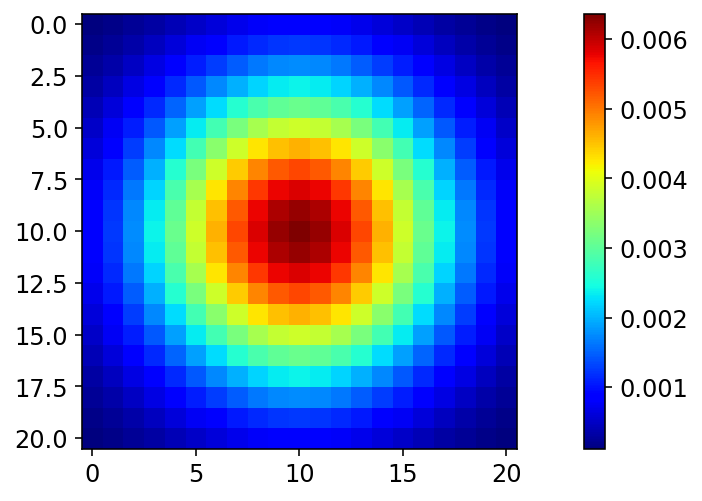

In [67]:
x = np.arange(-10, 11)

gauss_kernel1d = st.norm.pdf(x, 0, 5)

row = gauss_kernel1d.reshape((1,-1))  # 1 x 21 row vector
col = gauss_kernel1d.reshape((-1,1))  # 21 x 1 column vector

gauss_kernel2d = col @ row  # 21 x 21 matrix

plt.imshow(gauss_kernel2d, cmap='jet')
plt.colorbar();

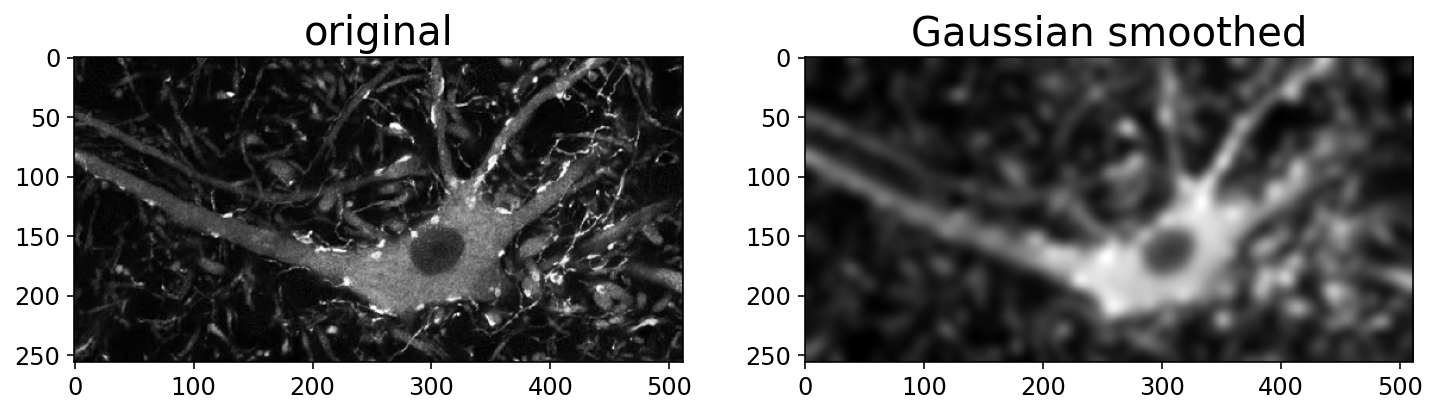

In [69]:
green_smoothed = ndimage.convolve(green, gauss_kernel2d)

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title('original');
plt.subplot(1,2,2)
plt.imshow(green_smoothed, cmap='gray')
plt.title('Gaussian smoothed');

Using ndimage...

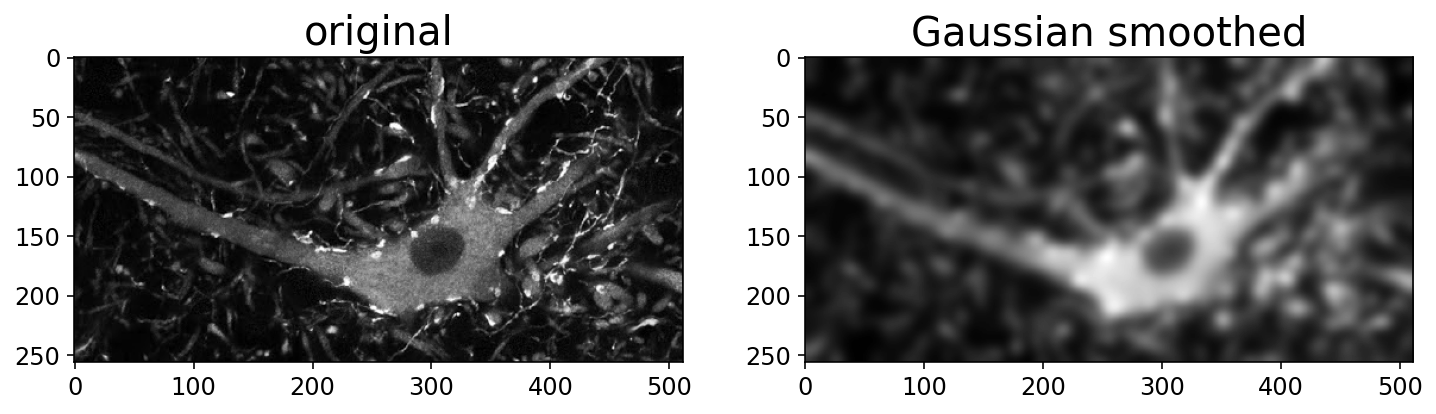

In [71]:
sigma = 5
green_smoothed = ndimage.gaussian_filter(green, sigma)

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title('original');

plt.subplot(1,2,2)
plt.imshow(green_smoothed, cmap='gray')
plt.title('Gaussian smoothed');

# Exercise

Change about the above Gaussian kernel with standard deviation 5 in both dimensions so as to filter the image either less or more.

In [ ]:
green_smoothed_less = ...
green_smoothed_more = ...

plt.subplot(1,2,1)
plt.imshow(green_smoothed_less, cmap='gray')
plt.title('less smoothing');

plt.subplot(1,2,2)
plt.imshow(green_smoothed_more, cmap='gray')
plt.title('more smoothing');

# Exercise

Convolve the green image with the following edge detection kernel.

![](images/conv-edge-detection-kernel.jpg)

In [ ]:
edge_kernel = ...

# convolve green image with edge kernel
green_edges = ...

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title('original');
plt.subplot(1,2,2)
plt.imshow(green_edges, cmap='gray')
plt.title('edges');

### Convolution and Probability Distributions

The distribution resulting from adding two random variables is the convolution of their distributions.

An interesting explanation of convolutions related to probability distributions: http://colah.github.io/posts/2014-07-Understanding-Convolutions/

Example: Pair of 6-sided dice.

![](images/dice.jpg)

Joint Probability

### P(A,B) = P(A) P(B)

![](images/dice.jpg)

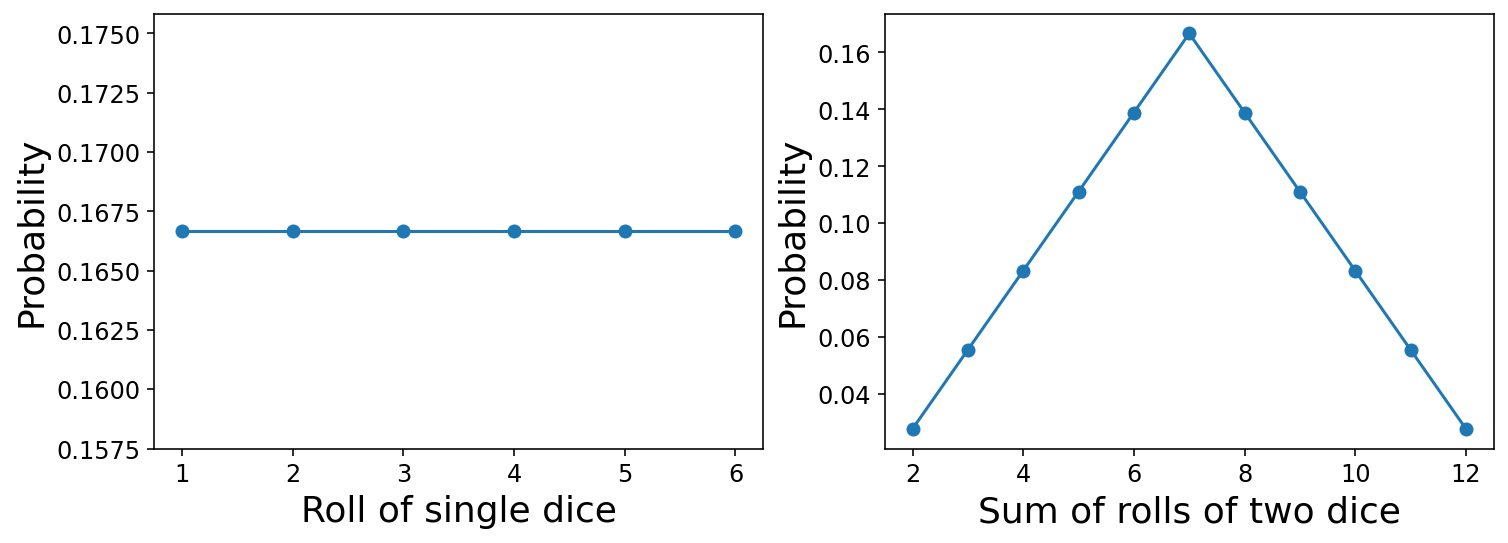

In [70]:
# 6 sided dice with equal probability for each number
roll_1 = np.arange(1,7)
prob_1 = np.ones((6,)) / 6

roll_2 = np.arange(2,13)
prob_2 = signal.convolve(prob_1, prob_1)

plt.subplot(1,2,1)
plt.plot(roll_1, prob_1, 'o-')
plt.xlabel('Roll of single dice')
plt.ylabel('Probability');

plt.subplot(1,2,2)
plt.plot(roll_2, prob_2, 'o-')
plt.xlabel('Sum of rolls of two dice')
plt.ylabel('Probability');

# Exercise

What is the probability of each possible sum of numbers upon rolling three six-sided dice?

In [ ]:
roll_3 = np.arange(3, 19)
prob_3 = ...

plt.plot(roll_3, prob_3, 'o-')
plt.xlabel('Sum of rolls of three dice')
plt.ylabel('Probability');